In [27]:
import pandas as pd
import itertools
import datetime
from config import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
transaction_file = 'transactions.csv'

In [3]:
df = pd.read_csv(transaction_file, parse_dates=['Date'], index_col = 'Date')
#df2 = df.truncate(after = '09/02/2016')

In [4]:
# Defining Groups


food = ['Restaurants','Fast Food','Groceries','Food & Dining']
coffee = ['Coffee Shops']
transport = ['Public Transportation','Gas & Fuel', 'Rental Car & Taxi','Auto & Transport','Parking']
travel = ['Travel','Coach Bus','Air Travel','Hotel']
drinks = ['Alcohol & Bars']
sport = ['Sports','Sporting Goods','Hobbies']
shopping = ['Electronics & Software','Music','Books','Clothing','Books & Supplies','Gift','Office Supplies','Mobile Phone'] # should it be a set?
entertainment = ['Event Tickets','Entertainment','Amusement','Arts']
fees = ['ATM Fee','Finance Charge','Fees & Charges','Bank Fee','State Tax','Federal Tax','Service Fee']
misc = ['Printing','Hair','Uncategorized','Business Services','Transfer for Cash Spending','Doctor','Eyecare','Misc Expenses']
home = ['Home','Utilities','Mortgage & Rent','Rent', 'Home Improvement']
edu = ['Education','Tuition']

llexpenses = [food, coffee, transport, travel, drinks, sport, shopping, entertainment, fees, misc, home, edu]
names = ['food','coffee','transport','travel','drinks','sport','shopping','entertainment','fees','misc', 'home', 'edu']

allcats = food+coffee+transport+travel+drinks+sport + shopping+ entertainment+fees+misc+home+edu
#expenses = food+coffee+transport+travel+drinks+sport + shopping+ entertainment+fees+misc

In [32]:
# Test this: what categories aren't in allcats? 
expenses_user = list(itertools.chain(*llexpenses)) # use itertools module to iterate over flattened list
expenses = df.Category.unique().tolist() # all categories
set(expenses_user) ^ set(expenses) # now write a test for this

{'Arts',
 'Bank Fee',
 'Cash & ATM',
 'Coach Bus',
 'Education',
 'Event Tickets',
 'Eyecare',
 'Federal Tax',
 'Finance Charge',
 'Hobbies',
 'Home',
 'Home Improvement',
 'Income',
 'Interest Income',
 'Legal',
 'Misc Expenses',
 'Mobile Phone',
 'Movies & DVDs',
 'Office Supplies',
 'Paycheck',
 'Pharmacy',
 'Reimbursement',
 'Rent',
 'Rental Income',
 'Returned Purchase',
 'Service & Parts',
 'Service Fee',
 'Shopping',
 'State Tax',
 'Transfer',
 'Transfer for Cash Spending'}

In [26]:
list(enumerate(llexpenses))

[(0, ['Restaurants', 'Fast Food', 'Groceries', 'Food & Dining']),
 (1, ['Coffee Shops']),
 (2,
  ['Public Transportation',
   'Gas & Fuel',
   'Rental Car & Taxi',
   'Auto & Transport',
   'Parking']),
 (3, ['Travel', 'Coach Bus', 'Air Travel', 'Hotel']),
 (4, ['Alcohol & Bars']),
 (5, ['Sports', 'Sporting Goods', 'Hobbies']),
 (6,
  ['Electronics & Software',
   'Music',
   'Books',
   'Clothing',
   'Books & Supplies',
   'Gift',
   'Office Supplies',
   'Mobile Phone']),
 (7, ['Event Tickets', 'Entertainment', 'Amusement', 'Arts']),
 (8,
  ['ATM Fee',
   'Finance Charge',
   'Fees & Charges',
   'Bank Fee',
   'State Tax',
   'Federal Tax',
   'Service Fee']),
 (9,
  ['Printing',
   'Hair',
   'Uncategorized',
   'Business Services',
   'Transfer for Cash Spending',
   'Doctor',
   'Eyecare',
   'Misc Expenses']),
 (10, ['Home', 'Utilities', 'Mortgage & Rent', 'Rent', 'Home Improvement']),
 (11, ['Education', 'Tuition'])]

In [20]:
type(df.Category)

pandas.core.series.Series

In [105]:
# Everything in All Cats
df = df.loc[df.Category.isin(expenses)]
df2 = df2.loc[df2.Category.isin(expenses)]

In [106]:
w1 = df['9/05/16':'9/11/16']
w2 = df['9/12/16':'9/18/16']
w3 = df['9/19/16':'9/25/16']

In [52]:
# Clean the data:
# Inspect large expenses, drop some
w1.loc[w1.Amount > 100].drop(w1.loc[w1.Amount > 100].index[[1]])
df2.loc[df2.Amount>100]

,Description,Original Description,Amount,Transaction Type,Category,Account Name,Labels,Notes
Date,,,,,,,,
2016-09-10,Chane Music Ci,"CHANE MUSIC AND CI800-992-7252, FL #0000",124.25,debit,Music,Investor Checking,NaN,NaN


In [107]:
sumry = pd.DataFrame(columns = ['Wk1','Wk2','Wk3'], index = names)

In [109]:
wk1_sumry = [w1.loc[w1.Category.isin(i)].Amount.sum() for i in llexpenses]

In [110]:
wk2_sumry = [w2.loc[w2.Category.isin(i)].Amount.sum() for i in llexpenses]

In [111]:
wk3_sumry = [w3.loc[w3.Category.isin(i)].Amount.sum() for i in llexpenses]

In [113]:
# Create df
sumry.Wk1 = wk1_sumry; sumry.Wk2 = wk2_sumry; sumry.Wk3 = wk3_sumry; sumry

,Wk1,Wk2,Wk3
food,26.59,30.23,26.40
coffee,10.05,21.75,18.15
transport,124.00,0.00,0.00
travel,0.00,3.45,0.00
drinks,0.00,6.89,0.00
sport,50.00,69.99,102.73
shopping,132.72,0.99,19.99
entertainment,243.00,3.25,0.00
fees,0.00,2.95,0.00
misc,0.00,0.00,0.00


In [139]:
# Add an averaged colummn
sumry['Expected'] = sumry.mean(axis=1)

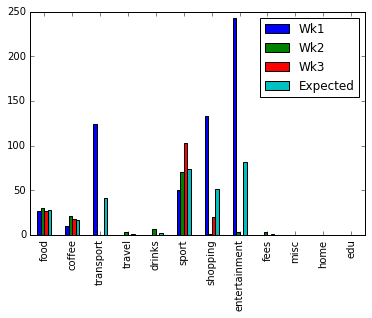

In [141]:
# Plot
sumry.plot.bar()

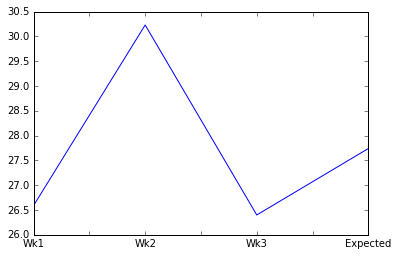

In [142]:
# Estimate of future spending
sumry.loc['food'].plot()
# average slope/delta
# average overal